#### Preparing Audio Files for CNN


For the cnn we want to input a the mel spectrograms of audio files, cropped to the first minute.

Spectrograms are a way to visually represent a signal's loudness, or amplitude, as it varies over time at different frequencies. The horizontal axis is time, the vertical axis is frequency, and the color is amplitude. It is calculated using the fast Fourier transform on short time windows of the signal and transforming the vertical axis (frequency) to log scale and the colored axis (amplitude) to decibals.

Now, what about the "mel" part? Humans are better at detecting differences in lower frequencies than higher frequencies. The mel scale transforms the frequency scale such that sounds at equal distances from each other also sound equal in distance. A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.


### Toy Example


In [1]:
import sys

sys.path.append("..")

In [2]:
import warnings
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd
import os
import librosa
from tqdm import tqdm
from src.utils.spectrograms import get_spectrograms, spectrogram_image

warnings.filterwarnings("ignore")

In [3]:
AUDIO_DIR = "../data/track_downloads/"
CSV_PATH = "../data/audio_features.csv"
SPEC_DIR = "../data/spectrograms/"
SR = 22050

example_audio_path = AUDIO_DIR + "7ya7Jv4hJ9W0Baz7h9nL7E.wav"

### Extracting an Audio Signal

A signal is a variation in a quantity over time. For audio, the quantity that varies is air pressure. We can represent a signal digitally by taking samples of the air pressure over time. We are left with a waveform for the signal. Librosa is a python library that allows us to extract waveforms from audio files along with several other features. This is the primary package that will be used for this project.


In [4]:
# Extracting the wave, "y", and sampling rate, "sr", of the audio file (first sixty seconds)
y, sr = librosa.load(example_audio_path, sr=SR, mono=True, duration=60)
print(f"sampling rate: {sr}, wave shape: {y.shape}")

sampling rate: 22050, wave shape: (1323000,)


Text(0, 0.5, 'Amplitude')

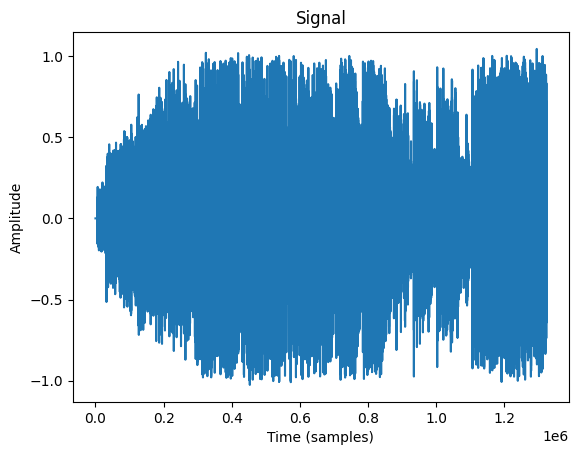

In [5]:
# Plotting the wave
plt.plot(y)
plt.title("Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")

### Mel Spectrograms

Spectrograms are a way to visually represent a signal's loudness, or amplitude, as it varies over time at different frequencies. The horizontal axis is time, the vertical axis is frequency, and the color is amplitude. It is calculated using the fast Fourier transform on short time windows of the signal and transforming the vertical axis (frequency) to log scale and the colored axis (amplitude) to decibals. Now, what about the "mel" part? Humans are better at detecting differences in lower frequencies than higher frequencies. The mel scale transforms the frequency scale such that sounds at equal distances from each other also sound equal in distance. A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.

This is what will be the input to the cnn!


Mel Spectrogram shape: (128, 646)


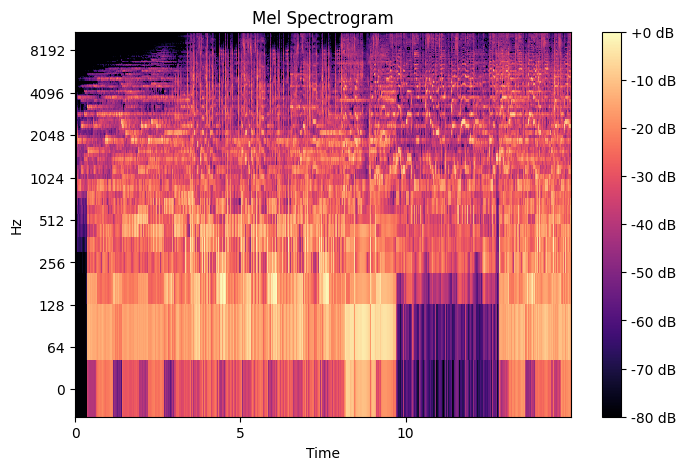

In [6]:
# Computing the mel spectrogram
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=2048)
spect_db = librosa.power_to_db(spect, ref=np.max)  # converting to decibals
#
# Plotting the spectrogram
plt.figure(figsize=(8, 5))
librosa.display.specshow(spect_db, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")

plt.title("Mel Spectrogram")
print(f"Mel Spectrogram shape: {spect.shape}")

#### Downloading mel spectrogram as a png image

In [7]:
# settings
hop_length = 2048 # number of samples per time-step in spectrogram
n_mels = 128 # number of bins in spectrogram. Height of image
time_steps = 384 # number of time-steps. Width of image

# load audio.
y, sr = librosa.load(example_audio_path, offset=1.0, duration=60, sr=22050)
out = 'out.png'

# extract a fixed length window
start_sample = 0 # starting at beginning
length_samples = time_steps*hop_length
window = y[start_sample:start_sample+length_samples]

# convert to PNG
spectrogram_image(y, sr=sr, out=out, hop_length=hop_length, n_mels=n_mels)
print('wrote file', out)


(128, 646)
wrote file out.png


### Saving Mel Spectrograms as Images


In [8]:
get_spectrograms(AUDIO_DIR, CSV_PATH, SPEC_DIR, 0, 5)

Processing row 0 of 3932
SHape: (128, 646)
type: <class 'numpy.ndarray'>'


OSError: cannot write mode F as JPEG

In [ ]:
spotify_df = pd.read_csv("../data/chartex_final.csv")
if os.path.exists("../data/spectrogram_df.csv"):
    spectrogram_df = pd.read_csv("../data/spectrogram_df.csv")

    # drop duplicate rows
    spectrogram_df.drop_duplicates(subset=["id"], inplace=True)

batch_size = 5

# for i in tqdm(range(0, len(spotify_df), batch_size)):
#     spectrogram_df = make_mel_spectrogram_df(audio_directory, '../data/spectrogram_df.csv', i, i+batch_size)
# print(f'Shape of dataframe: {spectrogram_df.shape}')

# Checking the shape of the dataframe

# Saving to csv
# spectrogram_df.to_csv('../data/spectrogram_df.csv', index=False)

In [ ]:
spectrogram_df = pd.read_csv("../data/spectrogram_df.csv")
print(f"Shape of dataframe: {spectrogram_df.shape}")